In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
#Load the dataset
df=pd.read_csv('netflix_titles.csv')
#EDA
display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9-Sep-19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,9-Sep-16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,8-Sep-18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,8-Sep-18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,8-Sep-17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
display(df.describe(), df.shape)

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


(6234, 12)

In [5]:
#Check to see if there is any missing data
print(df.isnull().sum())

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


### What is the distribution of content between movies and TV shows?

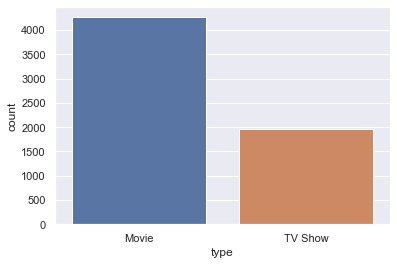

In [6]:
#No missing values in type, let's explore how many TV shows vs Movies are in the dataset
sns.set()
ax=sns.countplot(x='type', data=df)
plt.show()

Netflix has more than twice as many movies than TV shows available

In [91]:
#Subset the dataset by type
df_tv=df[df['type']=='TV Show']
df_movies=df[df['type']=='Movie']

### How many different rating types are there and which ones are the most popular?

In [11]:
print(df_movies['rating'].value_counts())

TV-MA       1348
TV-14       1038
R            506
TV-PG        432
PG-13        286
NR           202
PG           183
TV-G          80
TV-Y7         69
TV-Y          41
G             36
TV-Y7-FV      27
UR             7
NC-17          2
Name: rating, dtype: int64


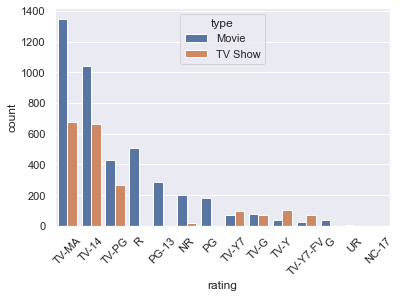

In [56]:
#Visualize rating by type
ax=sns.countplot(x='rating', data=df, hue='type', order=df['rating'].value_counts().index[:])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

The most popular rating by far is TV-MA for movies. For TV Shows, the number of TV-MA and TV-14 are around the same.

### Are the number of movies released every year increasing?

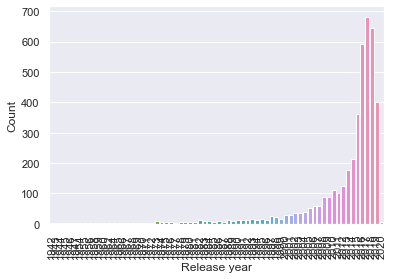

In [116]:
#Sort movies by year the plot with countplot
movies_sorted=df_movies.sort_values('release_year')
ax=sns.countplot(x='release_year', data=movies_sorted)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Count')
ax.set_xlabel('Release year')
plt.show()

The number of movies released each year has increased, peaking in 2017. We can see the affect COVID-19 has had on this year's number of movie releases; the number has decresed significantly.

### Are movies getting longer?

In [96]:
#Group by release year and find max of duration column
max_duration=movies_sorted.groupby('release_year')['duration'].max().reset_index(name='Max Duration')
#Sort by release year
max_duration=max_duration.sort_values('release_year')
#Get rid of "min" in Max Duration column and change to type int
max_duration['Max Duration']=max_duration['Max Duration'].str.replace('min', '')
max_duration['Max Duration']=max_duration['Max Duration'].astype(int)
#check head of max_duration
display(max_duration.head())

,release_year,Max Duration
0,1942,52
1,1943,82
2,1944,76
3,1945,63
4,1946,94


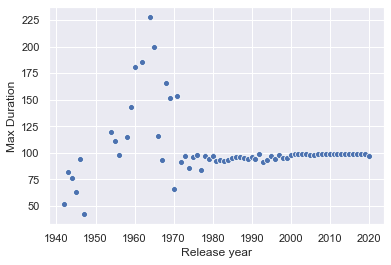

In [117]:
#Scatterplot of data
ax=sns.scatterplot(y='Max Duration', x='release_year', data=max_duration)
ax.set_xlabel('Release year')
plt.show()

The max duration of movies had been increasing over time, peaking in the mid 1960's at around 225 minutes. The max duration started to plateau at 99 minutes in the early 1970's and has continuted to stay at that level.

### Which country has released the most content?

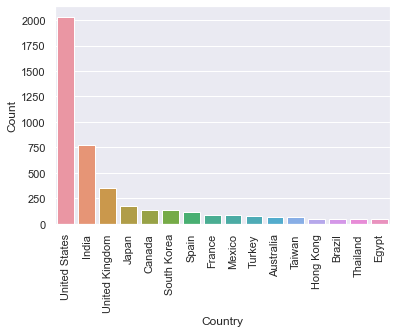

In [118]:
ax=sns.countplot(x='country', data=df, order=df['country'].value_counts().index[0:16])
ax.set_ylabel('Count')
ax.set_xlabel('Country')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

The United States has released the most content, followed by India and the United Kingdom

### Which category are most movies listed under?

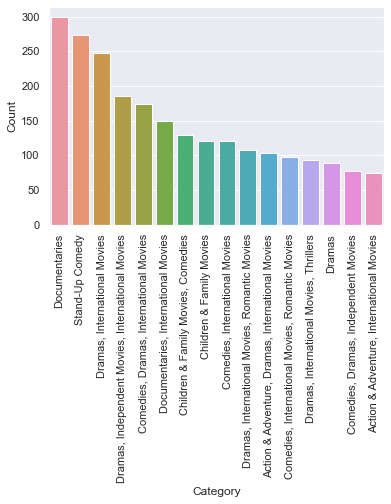

In [143]:
ax=sns.countplot(x='listed_in', data=df_movies, order=df_movies['listed_in'].value_counts().index[0:16])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Count')
ax.set_xlabel('Category')
plt.show()

The top three categories for movies are documentaries, stand-up comedy and dramatic international movies.